In [3]:
%cd ..

/home/drblobfish/Documents/Projet_M1/M1-S2-Projet


In [4]:
from src.main import *

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
algo_names = ["QR naif","QR hessenberg","QR shift Rayleigh"]
algos = [qr_algo_naive,qr_algo_hessenberg,qr_algo_hessenberg_rayleigh_quotient_shiftl]

In [15]:
Ns = np.arange(2,50)
NB_REP = 5

In [16]:
nb_sample = len(algos) * len(Ns) * NB_REP

In [17]:
df = pd.DataFrame(index = np.arange(nb_sample),columns=["N","nb iter","type"])

In [18]:
np.random.uniform(0,1,10)

array([0.67874607, 0.68366374, 0.79360163, 0.04309252, 0.81981016,
       0.36406038, 0.96906946, 0.43657384, 0.61797638, 0.53794981])

In [19]:
random_valid_matrix(4)

array([[-43.68772048,  28.41590707, -18.95391651,  35.09436923],
       [-37.90150348,  24.60319889, -14.98251329,  28.39243322],
       [-24.66343869,  15.0263437 ,  -8.04072509,  17.58316389],
       [-40.6634672 ,  25.94551314, -17.39522269,  33.12524667]])

In [20]:
i = 0
data = {"N" : [0]*nb_sample,
        "type" : [None]*nb_sample,
        "nb iter" : [0]*nb_sample}       
        
for N in Ns:
    for rep in range(NB_REP):
        M = random_valid_matrix(N)
        for (algo_name,algo) in zip(algo_names,algos):
            if i%10 == 0:
                print(f"Progress {i}/{nb_sample}")
            A = M.copy()
            _,_,nb_iter = algo(A,return_nb_iter=True)
            data["N"][i] = N
            data["type"][i] = algo_name
            data["nb iter"][i] = nb_iter
            i += 1

Progress 0/720
Progress 10/720
Progress 20/720
Progress 30/720
Progress 40/720
Progress 50/720
Progress 60/720
Progress 70/720
Progress 80/720
Progress 90/720
Progress 100/720
Progress 110/720
Progress 120/720
Progress 130/720
Progress 140/720
Progress 150/720
Progress 160/720
Progress 170/720
Progress 180/720
Progress 190/720
Progress 200/720
Progress 210/720
Progress 220/720
Progress 230/720
Progress 240/720
Progress 250/720
Progress 260/720
Progress 270/720
Progress 280/720
Progress 290/720
Progress 300/720
Progress 310/720
Progress 320/720
Progress 330/720
Progress 340/720
Progress 350/720
Progress 360/720
Progress 370/720
Progress 380/720
Progress 390/720
Progress 400/720
Progress 410/720
Progress 420/720
Progress 430/720
Progress 440/720
Progress 450/720
Progress 460/720
Progress 470/720
Progress 480/720
Progress 490/720
Progress 500/720
Progress 510/720
Progress 520/720
Progress 530/720
Progress 540/720
Progress 550/720
Progress 560/720
Progress 570/720
Progress 580/720
Progress

In [21]:
df = pd.DataFrame(data)

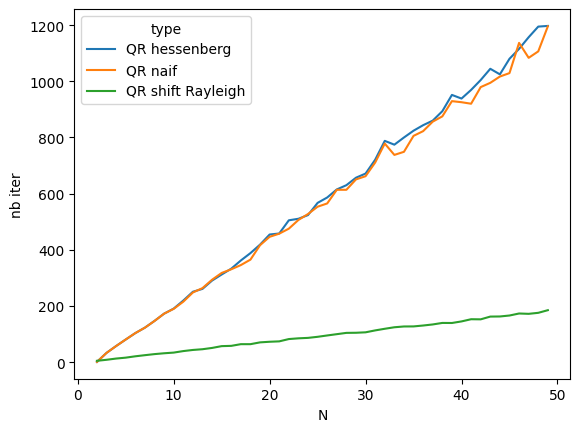

In [25]:
sns.lineplot(df.groupby(["N","type"]).mean().reset_index(),
             x = "N",
             y = "nb iter",
             hue = "type")
plt.savefig("figs/exp1.pdf")

In [29]:
alphas = 1-1/(np.linspace(2,5,5))

In [32]:
alphas

array([0.5       , 0.63636364, 0.71428571, 0.76470588, 0.8       ])

In [40]:
alphas = 1-1/(np.linspace(1,10,5))
i = 0
nb_sample = len(alphas) * NB_REP * len(algo_names)
data = {"alpha" : [0]*nb_sample,
        "type" : [None]*nb_sample,
        "nb iter" : [0]*nb_sample}       
        
for alpha in alphas:
    for rep in range(NB_REP):
        D = np.diag(10 * alpha**np.arange(4))
        S = np.random.uniform(-1,1,(4,4))
        Sinv = np.linalg.inv(S)
        M = S@D@Sinv

        for (algo_name,algo) in zip(algo_names,algos):
            if i%10 == 0:
                print(f"Progress {i}/{nb_sample}")
            A = M.copy()
            _,_,nb_iter = algo(A,return_nb_iter=True)
            data["alpha"][i] = alpha
            data["type"][i] = algo_name
            data["nb iter"][i] = nb_iter
            i += 1

Progress 0/75
Progress 10/75
Progress 20/75
Progress 30/75
Progress 40/75
Progress 50/75
Progress 60/75
Progress 70/75


<Axes: xlabel='alpha', ylabel='nb iter'>

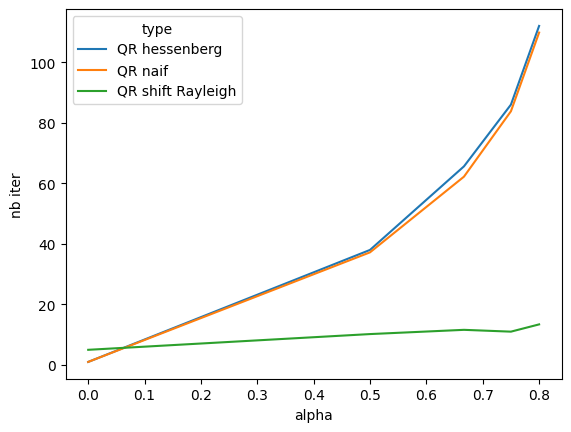

In [39]:
df = pd.DataFrame(data)
sns.lineplot(df.groupby(["alpha","type"]).mean().reset_index(),
             x = "alpha",
             y = "nb iter",
             hue = "type")
